In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

The following reads in a dataset of convenience stores and supermarket

In [2]:
stores = pd.read_csv("convenience.csv", index_col = None)
stores.head(10)

,Client ID,Name,Legal Name,Start Date,Street #,Street Name,State,Zip,Lat,Lon,Accuracy,Category
0,201211150002,Avalon Fuel,Avalon Fuel Company,10/26/2012,901,Ohio River Blvd,PA,15202.0,40.495759,-80.066508,9.0,Convenience Store
1,201511040005,Ez Energy #303/7Eleven #36183H,Neelkanth Ansh Enterprises Inc,10/26/2015,209,Ohio River Blvd,PA,15143.0,40.545418,-80.194152,9.0,Convenience Store
2,201212130003,EZ Energy #311 / 7 Eleven #36191H,7 Eleven Inc,12/3/2012,8136,Ohio River Blvd,PA,15202.0,40.510522,-80.094268,9.0,Convenience Store
3,201211190006,Getgo #3646 / Crafton - Ingram,Giant Eagle Inc,11/15/2012,280,Crafton Ingram Shopping circle,PA,15205.0,41.203322,-77.194525,3.0,Convenience Store
4,53583,Mt NeBlvd Texaco,Mt NeBlvd Texaco,6/2/1995,1706,Mt Nebo Rd,PA,15143.0,40.553281,-80.109158,8.0,Convenience Store
5,201304220008,Radokovic Marathon,Radokovic Enterprises LlC,4/16/2013,1826,Lincoln Highway,PA,15137.0,40.367923,-79.780429,9.0,Convenience Store
6,200002290002,Sunoco #7544,Sunoco Inc R&M,2/2/2000,1201,Airport Blvdulevard,PA,15231.0,40.494177,-80.267208,9.0,Convenience Store
7,52845,Sunoco A Plus Mini Market #8154,NaN,10/25/1994,5204,Interbo Ave,PA,15207.0,40.370214,-79.913195,9.0,Convenience Store
8,201310080001,Plow & Hearth,Plow & Hearth LLC,9/25/2013,1710,Settlers Ridge Center Dr,PA,15205.0,40.440641,-80.149132,5.0,Convenience Store
9,43192,S & R Market,Mac's Convenience Stores LLC,1/11/1988,4915,2nd Ave,PA,15207.0,40.529076,-80.025577,5.0,Convenience Store


In [7]:
stores["Category"].value_counts()

Convenience Store    515
Supermarket          156
Name: Category, dtype: int64

In [11]:
zips = stores["Zip"].value_counts()
zips.head(20)

15237.0    28
15146.0    22
15222.0    21
15108.0    19
15132.0    19
15210.0    18
15212.0    17
15213.0    17
15206.0    17
15136.0    17
15219.0    17
15235.0    16
15221.0    16
15236.0    16
15227.0    15
15122.0    15
15205.0    15
15090.0    12
15044.0    12
15217.0    11
Name: Zip, dtype: int64

The 10 zip codes that appear most often:
1. 15237 - McKnight, McCandless, PA
2. 15146 - Monroeville, PA
3. 15222 - Troy Hill, Pittsburgh, PA
4. 15108 - Corapolis, PA
5. 15132 - McKeesport, PA
6. 15210 - St. Clair, Pittsburgh, PA
7. 15212 - Perry South, Pittsburgh, PA
8. 15213 - North Oakland, Pittsburgh, PA
9. 15206 - Larimer, Pittsburgh, PA
10. 15136 - McKees Rocks, PA

Out of these 10, the ones that are neighborhoods in Pittsburgh:
1. Troy Hill
2. St. Clair
3. Perry South
4. North Oakland
5. Larimer
(But these just mean that they appear most often. We want to see which ones have the most convenience stores). 

In [14]:
zip = stores.groupby("Zip").count()
print(zip)

         Client ID  Name  Legal Name  Start Date  Street #  Street Name  \
Zip                                                                       
15014.0          2     2           1           2         2            2   
15017.0          9     9           8           9         9            9   
15018.0          1     1           1           1         1            1   
15024.0          4     4           3           4         4            4   
15025.0          5     5           3           5         5            5   
...            ...   ...         ...         ...       ...          ...   
15239.0          6     6           6           6         6            6   
15241.0          6     6           5           6         6            6   
15275.0          2     2           2           2         2            2   
15282.0          1     1           1           1         1            1   
16046.0          1     1           1           1         1            1   

         State  Lat  Lon

In [3]:
convenience = stores[stores['Category'].str.contains('Convenience Store', na = False)]
print(convenience)

        Client ID                               Name  \
0    201211150002                        Avalon Fuel   
1    201511040005     Ez Energy #303/7Eleven #36183H   
2    201212130003  EZ Energy #311 / 7 Eleven #36191H   
3    201211190006     Getgo #3646 / Crafton - Ingram   
4           53583                   Mt NeBlvd Texaco   
..            ...                                ...   
510  201406230007                 Wm Penn Hwy Sunoco   
511  200410180001                         WN Grocery   
512  201407280005               Zoscak's Food Market   
513         45034                     Zozos Marathon   
514  200704260001                        GetGo #3137   

                         Legal Name  Start Date Street #  \
0               Avalon Fuel Company  10/26/2012      901   
1    Neelkanth Ansh Enterprises Inc  10/26/2015      209   
2                      7 Eleven Inc   12/3/2012     8136   
3                   Giant Eagle Inc  11/15/2012      280   
4                  Mt NeBlv

In [26]:
con_zip = convenience["Zip"].value_counts()
print(con_zip)

15237.0    18
15222.0    17
15219.0    16
15108.0    16
15136.0    16
           ..
15018.0     1
15133.0     1
15030.0     1
16046.0     1
15057.0     1
Name: Zip, Length: 87, dtype: int64


In [28]:
con_zip.head(15)

15237.0    18
15222.0    17
15219.0    16
15108.0    16
15136.0    16
15212.0    14
15146.0    14
15210.0    14
15213.0    14
15221.0    13
15132.0    13
15206.0    13
15236.0    12
15235.0    11
15227.0    10
Name: Zip, dtype: int64

Updated list with most frequently appearing zip codes filtered with convenience stores only. 
1. 15237 - McKnight, McCandless, PA
2. 15222 - Troy Hill, Pittsburgh, PA
3. 15219 - Downtown, Pittsburgh, PA
4. 15108 - Coraopolis, PA
5. 15136 - McKees Rocks, PA
6. 15212 - Perry South, Pittsburgh, PA
7. 15146 - Monroeville, Pittsburgh, PA
8. 15210 - St. Clair, Pittsburgh, PA
9. 15213 - North Oakland, Pittsburgh, PA
10. 15221 - Pittsburgh, PA

In [4]:
store_name = convenience["Legal Name"].value_counts()
print(store_name)

Giant Eagle Inc               30
Sunoco Inc R&M                19
Sheetz Inc                    18
Co Go's                       13
7 Eleven Inc                  11
                              ..
Mahdev Corp                    1
Syed J Hernect LLC             1
Eddies Snacks & Smokes LLC     1
SJ Retail Services LLC         1
Dr Petroleum Co                1
Name: Legal Name, Length: 245, dtype: int64


In [9]:
no_giant = convenience[convenience["Legal Name"].str.contains("Giant Eagle Inc") == False]
nogiant2 = no_giant["Legal Name"].value_counts()
print(nogiant2)

Sunoco Inc R&M                19
Sheetz Inc                    18
Co Go's                       13
7 Eleven Inc                  11
Speedway LLC                  10
                              ..
R & D Ventures Inc             1
Mahdev Corp                    1
Syed J Hernect LLC             1
Eddies Snacks & Smokes LLC     1
SGII Group LLC                 1
Name: Legal Name, Length: 244, dtype: int64


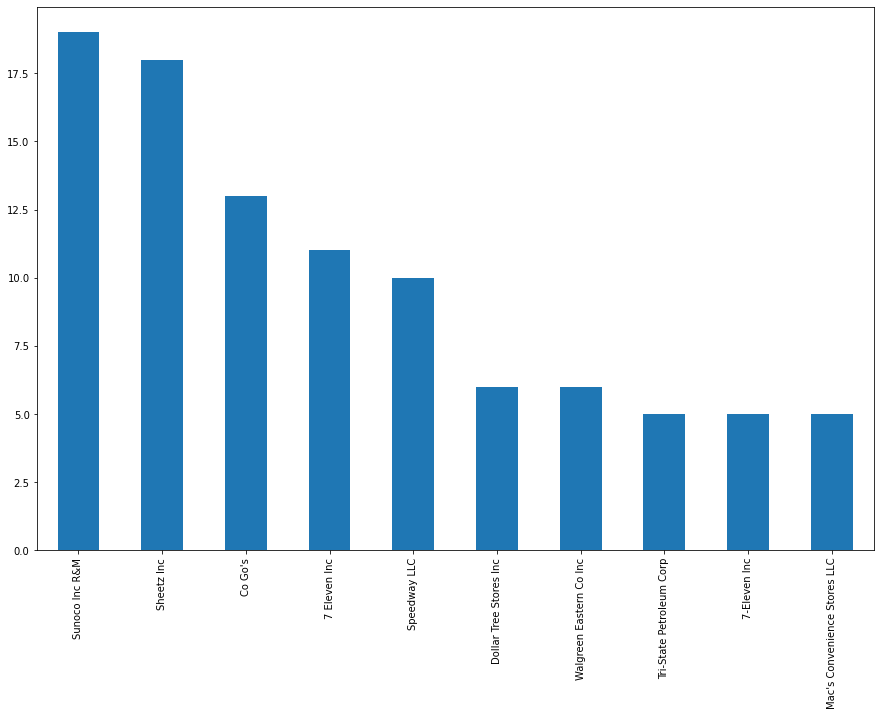

In [18]:
plotting = nogiant2.head(10)
plotting.plot.bar(figsize=(15, 10))

In [11]:
no_giant_zip = no_giant["Zip"].value_counts()
no_giant_zip.head(10)

15237.0    16
15108.0    13
15146.0    12
15132.0    11
15222.0    10
15136.0    10
15212.0     9
15213.0     9
15236.0     8
15227.0     8
Name: Zip, dtype: int64

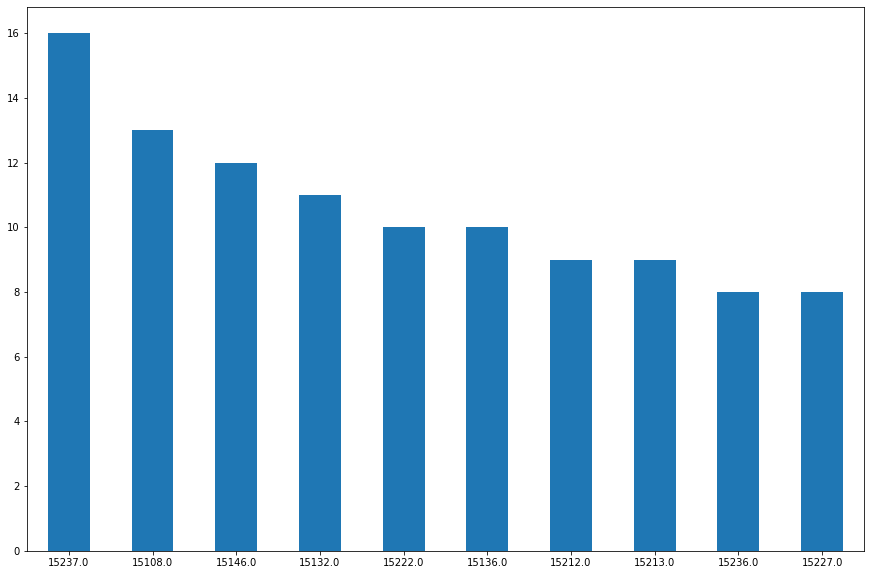

In [20]:
no_giant_zip.head(10).plot.bar(rot = 0, figsize=(15, 10))

1. 15237 - McKnight, McCandless, PA
2. 15108 - Coraopolis, PA
3. 15146 - Monroeville, PA
4. 15132 - Mckeesport, PA
5. 15222 - Troy Hill, Pittsburgh, PA
6. 15136 - McKees Rocks, PA
7. 15212 - Perry South, Pittsburgh, PA
8. 15213 - Oakland, Pittsburgh, PA
9. 15236 - Pittsburgh
10. 15227 - Pittsburgh

In [12]:
sevEleven = no_giant[no_giant["Legal Name"].str.contains("7 Eleven Inc")]
print(sevEleven["Zip"].value_counts())

15237.0    4
15101.0    2
15205.0    1
15225.0    1
15136.0    1
15222.0    1
15226.0    1
15202.0    1
Name: Zip, dtype: int64


Since 7 Eleven is a store with nutritional choices for grocery shopping, I chose to look at the zip codes with the most 7 Elevens. Narrowing it down to these, the above are the most frequently appearing zip codes. Based on this data, the zip code with the most 7 Elevens is associated with the neighborhood of Troy Hill.